<a href="https://colab.research.google.com/github/ghl051/ghl051/blob/main/Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Data imbalance
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
#import data
link = "https://drive.google.com/file/d/12AQMi007QX_m5DqOdI-OFMwaxDz0SfTI/view?usp=drive_link"
path = 'https://drive.google.com/uc?export=download&id=' + link.split('/')[-2]
df = pd.read_csv(path) #dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            78298 non-null  int64  
 1   employee_id           78298 non-null  int64  
 2   department            78298 non-null  object 
 3   region                78298 non-null  object 
 4   education             74855 non-null  object 
 5   gender                78298 non-null  object 
 6   recruitment_channel   78298 non-null  object 
 7   no_of_trainings       78298 non-null  int64  
 8   age                   78298 non-null  int64  
 9   previous_year_rating  72362 non-null  float64
 10  length_of_service     78298 non-null  int64  
 11  KPIs_met >80%         78298 non-null  int64  
 12  awards_won?           78298 non-null  int64  
 13  avg_training_score    78298 non-null  int64  
 14  is_promoted           54808 non-null  float64
dtypes: float64(2), int6

In [ ]:
df.head

<bound method NDFrame.head of        Unnamed: 0  employee_id         department     region  \
0               0        65438  Sales & Marketing   region_7   
1               1        65141         Operations  region_22   
2               2         7513  Sales & Marketing  region_19   
3               3         2542  Sales & Marketing  region_23   
4               4        48945         Technology  region_26   
...           ...          ...                ...        ...   
78293       78293        53478              Legal   region_2   
78294       78294        25600         Technology  region_25   
78295       78295        45409                 HR  region_16   
78296       78296         1186        Procurement  region_31   
78297       78297         5973         Technology  region_17   

              education gender recruitment_channel  no_of_trainings  age  \
0      Master's & above      f            sourcing                1   35   
1            Bachelor's      m               othe

In [ ]:
# data distribution
display(df.describe())  # numerical data
display(df.describe(exclude = [int, float]))  # categorical data

,Unnamed: 0,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39148.500000,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.085170
std,22602.830026,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.279137
min,0.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19574.250000,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39148.500000,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58722.750000,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78297.000000,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


,department,region,education,gender,recruitment_channel
count,78298,78298,74855,78298,78298
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,24155,17642,52247,55092,43524


In [ ]:
#xoá dữ liệu các dòng có dữ liệu null tại cột  'is_promted'
df.dropna(subset=['is_promoted'], inplace=True)
df

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0.0
54804,54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0.0
54805,54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0.0
54806,54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0.0


In [6]:
# drop unimportant features
df.drop(['employee_id', 'department', 'region', 'recruitment_channel'], axis=1, inplace=True)

**UNIVARIATE DATA ANALYSIS**

In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [8]:
# df.Sex = df.Sex.map({'male':0, 'female':1})
df["gender"].replace(['m', 'f'], [0,1], inplace = True)

In [9]:
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(), inplace=True)
df["education"].fillna(df["education"].mode().values[0], inplace=True)

<Axes: xlabel='is_promoted', ylabel='count'>

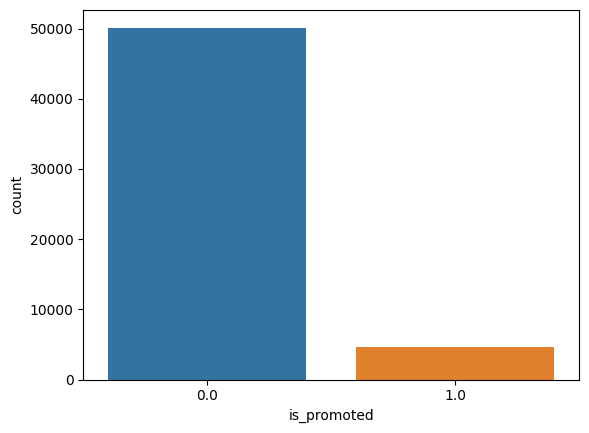

In [10]:
sns.countplot(x="is_promoted", data=df)

<Axes: xlabel='is_promoted', ylabel='count'>

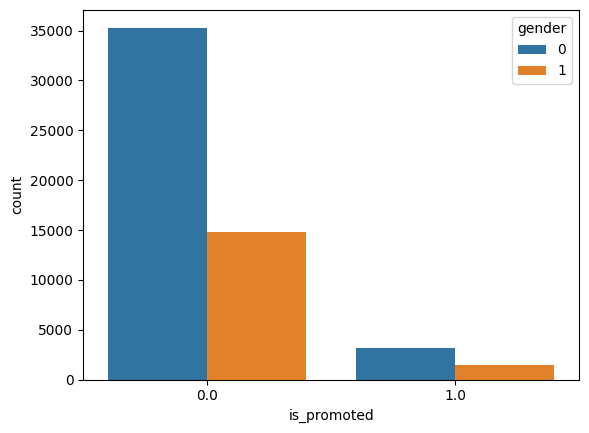

In [11]:
import seaborn as sns
sns.countplot(x="is_promoted", hue="gender", data=df)

<ipython-input-12-8127bf44847a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True)


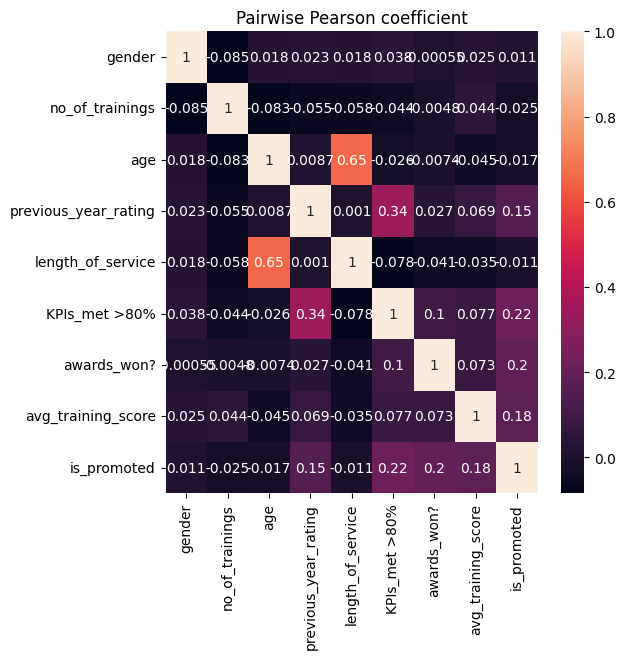

In [12]:
# HEATMAP
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(df.corr(), annot=True)
ax.set_title('Pairwise Pearson coefficient')
plt.show()

In [13]:
# fill NA
df["previous_year_rating"].fillna(df["previous_year_rating"].mode().values[0], inplace=True)

In [14]:
df

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Master's & above,1,1,35,5.000000,8,1,0,49,0.0
1,Bachelor's,0,1,30,5.000000,4,0,0,60,0.0
2,Bachelor's,0,1,34,3.000000,7,0,0,50,0.0
3,Bachelor's,0,2,39,1.000000,10,0,0,50,0.0
4,Bachelor's,0,1,45,3.000000,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...
78293,Below Secondary,0,1,24,3.000000,1,0,0,61,NaN
78294,Bachelor's,0,1,31,3.000000,7,0,0,74,NaN
78295,Bachelor's,1,1,26,4.000000,4,0,0,50,NaN
78296,Bachelor's,0,3,27,3.332219,1,0,0,70,NaN


In [19]:
# transform Education (One hot encoding)
ports = pd.get_dummies(df.education, prefix='education')

In [20]:
df

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above
0,Master's & above,1,1,35,5.000000,8,1,0,49,0.0,0,0,1
1,Bachelor's,0,1,30,5.000000,4,0,0,60,0.0,1,0,0
2,Bachelor's,0,1,34,3.000000,7,0,0,50,0.0,1,0,0
3,Bachelor's,0,2,39,1.000000,10,0,0,50,0.0,1,0,0
4,Bachelor's,0,1,45,3.000000,2,0,0,73,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,Below Secondary,0,1,24,3.000000,1,0,0,61,NaN,0,1,0
78294,Bachelor's,0,1,31,3.000000,7,0,0,74,NaN,1,0,0
78295,Bachelor's,1,1,26,4.000000,4,0,0,50,NaN,1,0,0
78296,Bachelor's,0,3,27,3.332219,1,0,0,70,NaN,1,0,0


In [21]:
df.drop(['education'], axis=1, inplace=True)

In [22]:
df.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above
0,1,1,35,5.0,8,1,0,49,0.0,0,0,1
1,0,1,30,5.0,4,0,0,60,0.0,1,0,0
2,0,1,34,3.0,7,0,0,50,0.0,1,0,0
3,0,2,39,1.0,10,0,0,50,0.0,1,0,0
4,0,1,45,3.0,2,0,0,73,0.0,1,0,0


In [23]:
# SMOTE: Split X, y
X = df.drop(columns=['KPIs_met >80%'])
y = df['KPIs_met >80%']

In [24]:
X.head()

,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,education_Bachelor's,education_Below Secondary,education_Master's & above
0,1,1,35,5.0,8,0,49,0.0,0,0,1
1,0,1,30,5.0,4,0,60,0.0,1,0,0
2,0,1,34,3.0,7,0,50,0.0,1,0,0
3,0,2,39,1.0,10,0,50,0.0,1,0,0
4,0,1,45,3.0,2,0,73,0.0,1,0,0


In [26]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: KPIs_met >80%, dtype: int64

In [28]:
#transform dataset
# error: NA - cannot use SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

ValueError: ignored

In [29]:
# count y
counter = Counter(y)
counter

Counter({1: 27720, 0: 50578})

In [30]:
X = df.drop(columns=['KPIs_met >80%'])
y = df['KPIs_met >80%']
oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
counter

Counter({1: 50578, 0: 50578})

In [31]:
X = df.drop(columns=['KPIs_met >80%'])
y = df['KPIs_met >80%']
oversample = RandomUnderSampler(sampling_strategy='majority')
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
counter

Counter({0: 27720, 1: 27720})

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)

(38808, 11) (16632, 11)


In [33]:
model_scale = StandardScaler()
model_scale.fit(X_train)
X_train_scale = model_scale.transform(X_train)
X_test_scale = model_scale.transform(X_test)
print(X_train)
print(X_train_scale)

       gender  no_of_trainings  age  previous_year_rating  length_of_service  \
4664        0                1   40                   3.0                  7   
18926       0                1   35                   2.0                  3   
33184       1                1   32                   5.0                  5   
694         0                1   31                   1.0                  9   
42990       0                1   27                   5.0                  4   
...       ...              ...  ...                   ...                ...   
45891       0                1   42                   5.0                 10   
52416       0                1   57                   5.0                 15   
42613       0                1   37                   5.0                  3   
43567       0                1   27                   3.0                  2   
2732        0                1   32                   3.0                  7   

       awards_won?  avg_training_score 